In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

In [3]:
def func(x):
    return np.sin(x) * np.exp(-1*((0.2*x)**2))

In [4]:
x = np.linspace(-10, 10, 2000)
x.shape

(2000,)

In [5]:
y = func(x)
y.shape

(2000,)

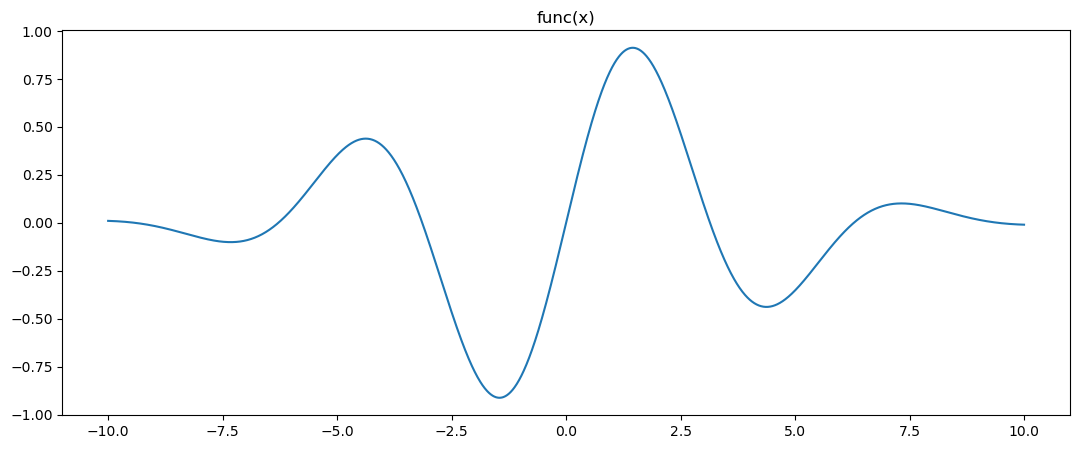

In [6]:
x_train = torch.from_numpy(x).to(dtype=torch.float32)
y_train = torch.from_numpy(y).to(dtype=torch.float32)

plt.plot(x_train.numpy(), y_train.numpy())
plt.title('func(x)');

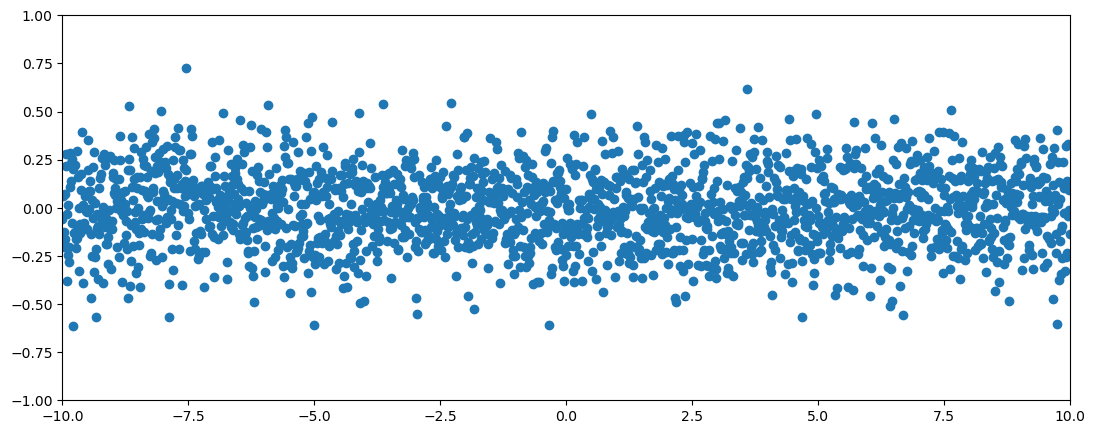

In [7]:
noise = torch.randn(y_train.shape[0]) / 5.0

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1]);

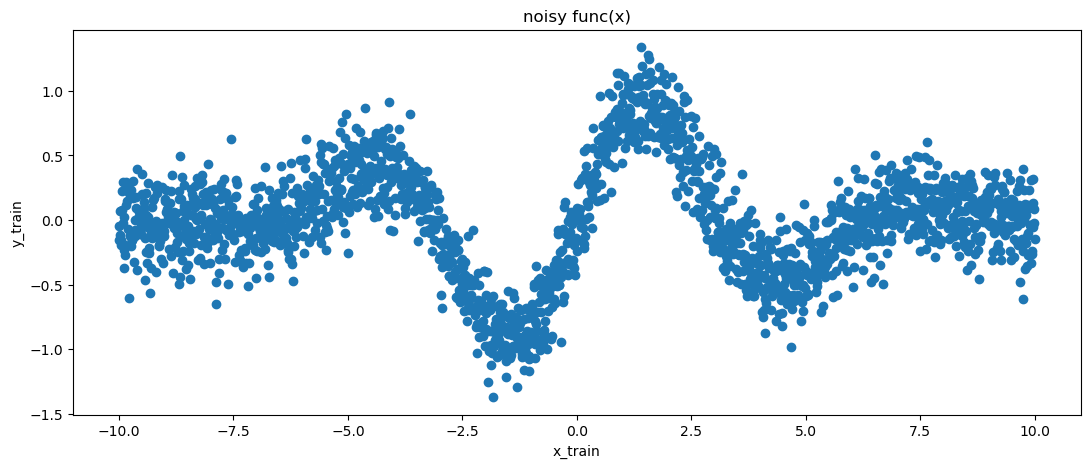

In [8]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy func(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [9]:
# 2000 строк по 1-ой колонке
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
x_train.shape, y_train.shape

(torch.Size([2000, 1]), torch.Size([2000, 1]))

# Test dataset

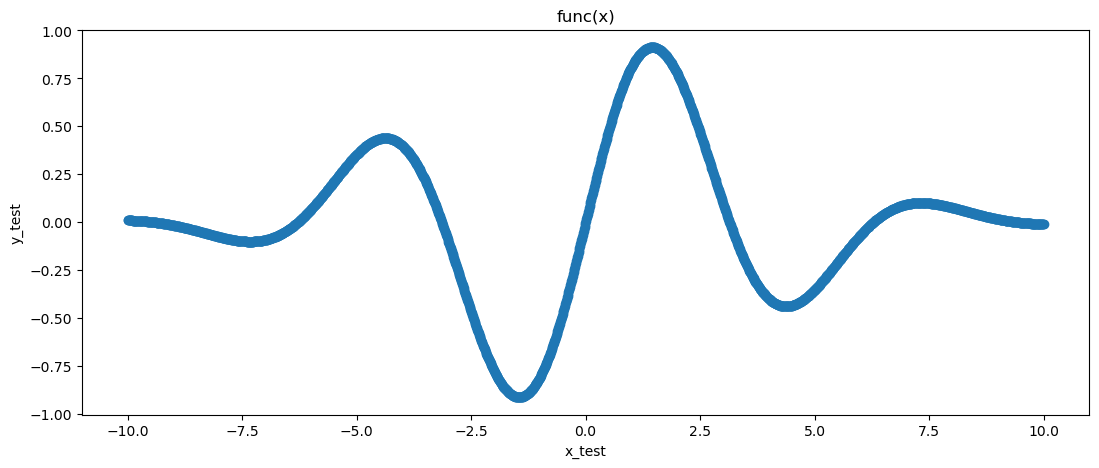

In [10]:
x_test = torch.from_numpy(x).to(dtype=torch.float32)
y_test = torch.from_numpy(y).to(dtype=torch.float32)

plt.plot(x_test.numpy(), y_test.numpy(), 'o')
plt.title('func(x)')
plt.xlabel('x_test')
plt.ylabel('y_test');

In [11]:
# 2000 строк по 1-ой колонке
x_test.unsqueeze_(1)
y_test.unsqueeze_(1)
#x_test.dtype, y_test.dtype
x_test.shape, y_test.shape

(torch.Size([2000, 1]), torch.Size([2000, 1]))

# Model construction

In [12]:
class MyNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        #self.act1 = torch.nn.ReLU()
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

my_net = MyNet(10)

# Prediction

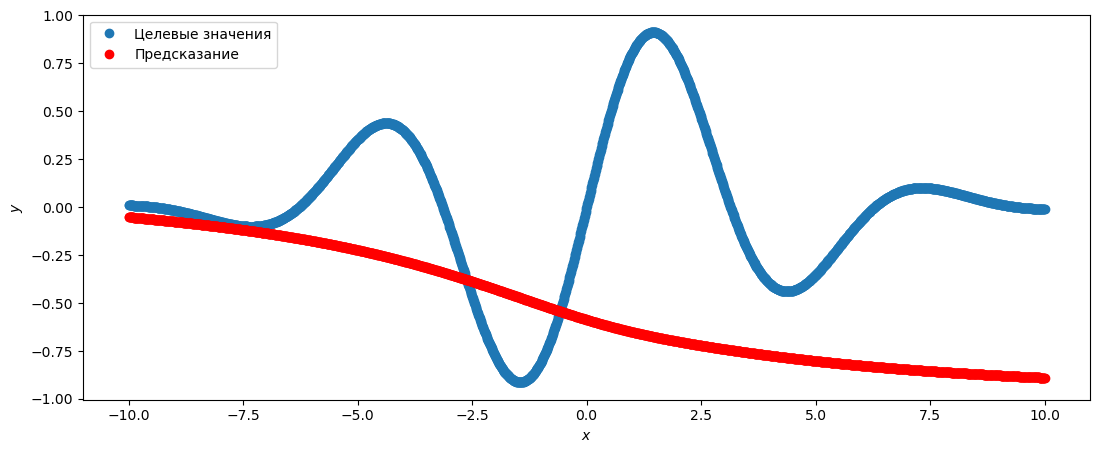

In [13]:
def predict(net, x, y):
    y_pred = net(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Целевые значения')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Предсказание');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(my_net, x_test, y_test)

# Optimizer

In [14]:
optimizer = torch.optim.Adam(my_net.parameters(), lr=0.01)

# Функция потерь

In [15]:
def loss_MSE(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

loss_fn = torch.nn.MSELoss()

# Training procedure

In [16]:
EPOCHS = 1000
for epoch in range(1, EPOCHS+1):
    y_pred_train = my_net(x_train)
    loss_train = loss_fn(y_pred_train, y_train)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

y_pred_test = my_net(x_test)
loss_test = loss_MSE(y_pred_test, y_test)
print(f'MSE на test: {loss_test.item():.4f}')

MSE на test: 0.0059


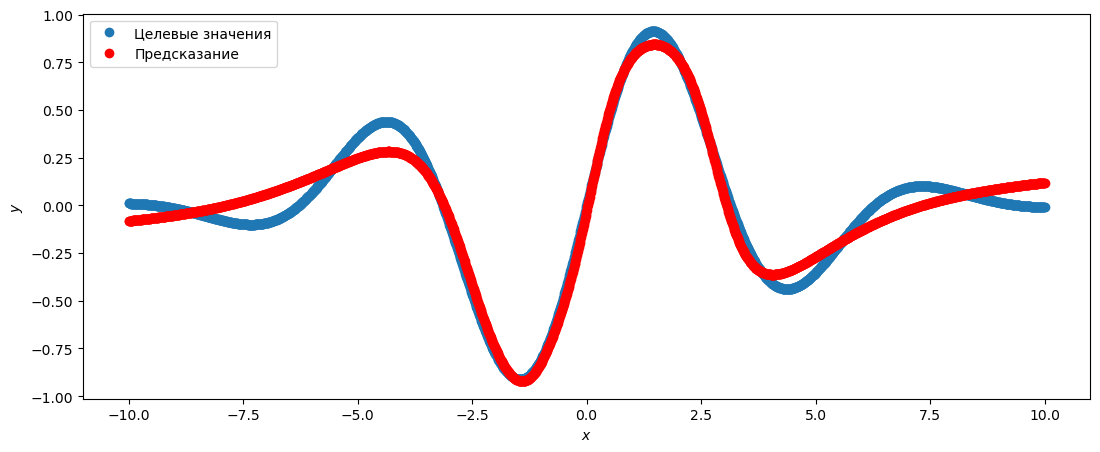

In [17]:
predict(my_net, x_test, y_test)

In [18]:
# Простите, что немного не по заданию
# Но сделал как смог